# Загрузка необходимых библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Исследование данных

In [3]:
churn_data = pd.read_csv('../data/churn.txt', encoding='Cp1251')

In [4]:
churn_data.head()

,Штат,Длина счета,Код зоны,Номер телефона,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,...,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
churn_data.shape

(3333, 21)

Посмотрим типы данных столбцов

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Штат                          3333 non-null   object 
 1   Длина счета                   3333 non-null   int64  
 2   Код зоны                      3333 non-null   int64  
 3   Номер телефона                3333 non-null   object 
 4   Услуга международных звонков  3333 non-null   bool   
 5   Услуга VMail                  3333 non-null   bool   
 6   Количество VMail              3333 non-null   int64  
 7   Дневные минуты                3333 non-null   float64
 8   Дневные звонки                3333 non-null   int64  
 9   Дневная оплата                3333 non-null   float64
 10  Вечерние минуты               3333 non-null   float64
 11  Вечерние звонки               3333 non-null   int64  
 12  Вечерняя оплата               3333 non-null   float64
 13  Ноч

Посмотрим, как много пропусков в данных мы имеем

In [7]:
churn_data.isna().sum()

Штат                            0
Длина счета                     0
Код зоны                        0
Номер телефона                  0
Услуга международных звонков    0
Услуга VMail                    0
Количество VMail                0
Дневные минуты                  0
Дневные звонки                  0
Дневная оплата                  0
Вечерние минуты                 0
Вечерние звонки                 0
Вечерняя оплата                 0
Ночные минуты                   0
Ночные звонки                   0
Ночная оплата                   0
Международные минуты            0
Международные звонки            0
Международная оплата            0
Обращений в СЦ                  0
Уход                            0
dtype: int64

Let's see the churn distribution in the data

In [8]:
churn_data.groupby("Уход").size()


Уход
False    2850
True      483
dtype: int64

We see that our data is imbalanced so we have to take into consideration while training a model

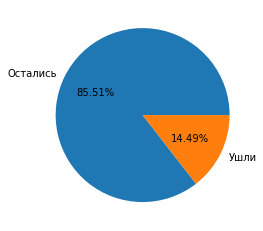

In [9]:
labels = ["Остались", "Ушли"]
values = churn_data.groupby("Уход").size().values

fig, ax = plt.subplots()
ax.pie(values, labels=labels,  autopct='%1.2f%%')
plt.show()

Let's see how many states and code zone we have

In [10]:
churn_data["Штат"].nunique()

51

In [11]:
churn_data["Код зоны"].nunique()

3

In [12]:
churn_data.groupby(["Код зоны", "Уход"]).size()

Код зоны  Уход 
408       False     716
          True      122
415       False    1419
          True      236
510       False     715
          True      125
dtype: int64

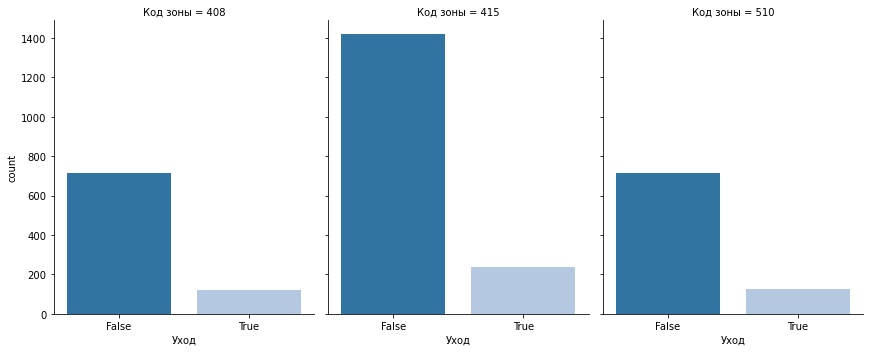

In [13]:
sns.catplot(x="Уход", col="Код зоны", col_wrap=4,
                data=churn_data,
                kind="count", height=5, aspect=.8, 
                palette='tab20',)
plt.show()

Из графика выше мы видим, что местоположение пользователей не влияет на отток клиентов, т.е. для всех зон соотношение ушедших и оставшихся пользователей одинаковый. 

Для более детального анализа нужно посмореть на отток пользователей в штатах.

In [14]:
# # Для того, чтобы отобразить диаграмму для каждого штата. В данном случае на одной картинке будут все графики для каждого штата

# labels = ["Остались", "Ушли"]
# states = churn_data["Штат"].unique()
# print(values[0])
# fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(100, 100))

# for state in range(len(values) - 1):
#     values = churn_data.groupby(["Штат", "Уход"]).size()[states[state]].values
#     ax[0, 0].pie(values, labels=labels,  autopct='%1.2f%%')
#     ax[0, 1].pie(values)
#     break

In [15]:
# Посмотрим, какое количество пользователей ушло и осталось в каждом штате
is_gone = churn_data[churn_data["Уход"] == True].groupby("Штат").size().to_frame().reset_index().rename(columns={0: "Ушли"})
not_gone = churn_data[churn_data["Уход"] == False].groupby("Штат").size().to_frame().reset_index().rename(columns={0: "Остались"})

is_gone.head()

,Штат,Ушли
0,AK,3
1,AL,8
2,AR,11
3,AZ,4
4,CA,9


In [16]:
not_gone.head()

,Штат,Остались
0,AK,49
1,AL,72
2,AR,44
3,AZ,60
4,CA,25


In [17]:
states = is_gone.merge(not_gone, how="left", on="Штат")
states.head()

,Штат,Ушли,Остались
0,AK,3,49
1,AL,8,72
2,AR,11,44
3,AZ,4,60
4,CA,9,25


In [18]:
states["Процент оставшихся"] = (states["Остались"] / (states["Остались"] + states["Ушли"]) * 100).round(2)
states["Процент ушедших"] = 100 - states["Процент оставшихся"]
states.sort_values("Процент оставшихся", inplace=True, ascending=False)
states.head()

,Штат,Ушли,Остались,Процент оставшихся,Процент ушедших
11,HI,3,50,94.34,5.66
0,AK,3,49,94.23,5.77
3,AZ,4,60,93.75,6.25
45,VA,5,72,93.51,6.49
12,IA,3,41,93.18,6.82


In [19]:
states.tail()

,Штат,Ушли,Остались,Процент оставшихся,Процент ушедших
40,SC,14,46,76.67,23.33
20,MD,17,53,75.71,24.29
43,TX,18,54,75.00,25.00
31,NJ,18,50,73.53,26.47
4,CA,9,25,73.53,26.47


In [20]:
# Посмотрим, на количество обращений в сервисный центр по штатам
churn_data.groupby(["Штат"])["Обращений в СЦ"].sum().sort_values(ascending=False).to_frame().reset_index().head()

,Штат,Обращений в СЦ
0,WV,159
1,NY,142
2,OR,135
3,MN,130
4,VT,127


In [21]:
states = states.merge(churn_data.groupby(["Штат"])["Обращений в СЦ"].sum().sort_values(ascending=False), how="left", on="Штат")
states.head()

,Штат,Ушли,Остались,Процент оставшихся,Процент ушедших,Обращений в СЦ
0,HI,3,50,94.34,5.66,82
1,AK,3,49,94.23,5.77,81
2,AZ,4,60,93.75,6.25,102
3,VA,5,72,93.51,6.49,123
4,IA,3,41,93.18,6.82,70


In [22]:
# Посмотрим, есть ли взаимосвязть между количеством оставшихся пользователей и количеством обращений в СЦ по штатам
states["Процент оставшихся"].corr(states["Обращений в СЦ"])

-0.13146749215135117

**По значению коэф. корреляции можно сказать, что две величины имеют слабую взаимосвязь с друг другом**

Построим матрицу корреляций для фичей из исходной таблице. Ее результаты понадобятся нам, для построения предсказывающей модели.

<AxesSubplot:>

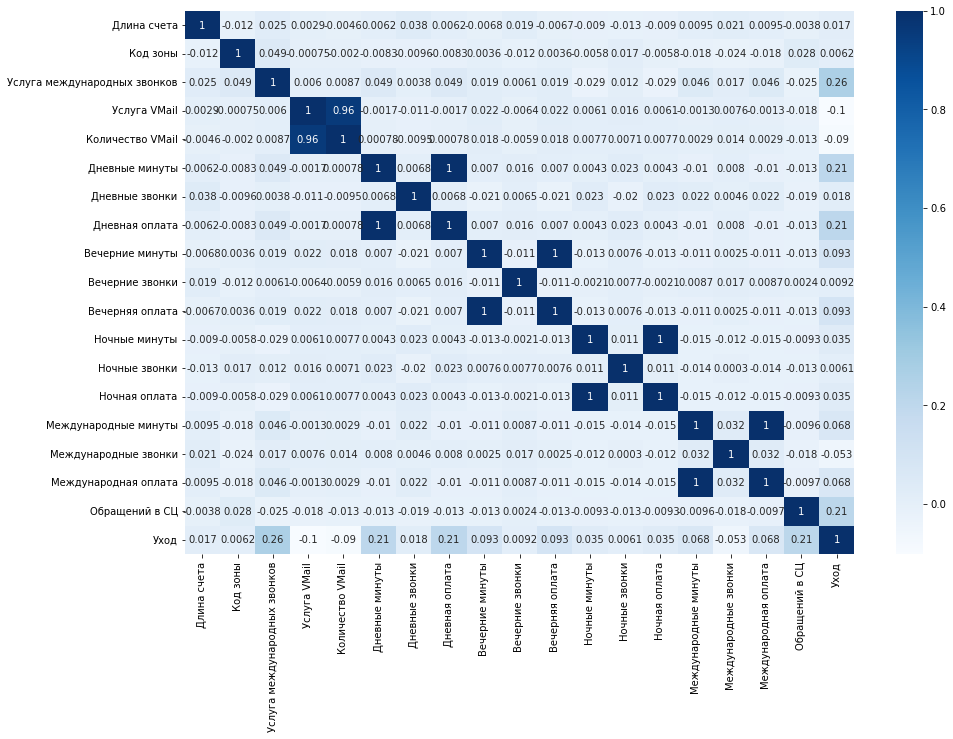

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(churn_data.corr(), cmap="Blues", annot=True)

Мы видим, что фичи "Количество Vmail" и "Услуга Vmail" сильно коррелируют между собой, а также фичи связанные с вечерними/дневными минутами и дневной/вечерней оплатой тоже имеют сильную корреляцию. Соответственно, из этих пар мы оставим только по одной фиче.